In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm 
import glob as glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.patches import Rectangle

import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import colormaps

import pymannkendall as mk

import glob as glob
import matplotlib.path as mpath
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.ticker import ScalarFormatter,AutoLocator,MultipleLocator,AutoMinorLocator,FixedLocator
import matplotlib.patches as mpatches

from imods.stats import *
from imods.stats import sia_index

import warnings
warnings.filterwarnings("ignore")

## Load in variables

In [2]:
qflx = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.QFLX.197901-202212.nc')
qflx.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qflx

<xarray.Dataset>
Dimensions:    (time: 528, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: nbnd
Data variables:
    time_bnds  (time, nbnd) object ...
    QFLX       (time, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             isotope-nudging2
    title:            UNSET
    logname:          qinghua
    host:             amery.eri.ucsb.e
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.ie12.B1850C5CN.f19_g16.LME.002.cam.i.1850-01-01-00000.nc
    topography_file:  /home/scratch-qinghua3/CESM/input/atm/cam/topo/USGS-gto...

In [3]:
qrain = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.RAIN.197901-202212.nc')
qrain.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qrain

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    RAIN         (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [4]:
qsnow = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.SNOW.197901-202212.nc')
qsnow.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qsnow

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    SNOW         (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [5]:
qvege = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QVEGE.197901-202212.nc')
qvege.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qvege

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QVEGE        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [6]:
qvegt = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QVEGT.197901-202212.nc')
qvegt.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qvegt

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QVEGT        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

In [7]:
qsoil = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/lnd/isotope-nudging2.clm.h0.QSOIL.197901-202212.nc')
qsoil.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
qsoil

<xarray.Dataset>
Dimensions:      (time: 528, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    time_bounds  (time, hist_interval) object ...
    QSOIL        (time, lat, lon) float32 ...
Attributes: (12/14)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/15/23 23:32:43
    source:                               Community Land Model CLM4.0
    hostname:                             ucsb
    ...                                   ...
    revision_id:                          $Id: histFileMod.F90 70608 2015-05-...
    case_title:                           UNSET
    case_id:                              isotope-nudging2
    Surface_dataset:                      surfdata_1.9x2.5_simyr1850_c091108.nc
    Initial_conditions_dataset:           b.ie12.B1850C5CN.f19_g16.LME.002.cl...
    PFT_physiological_constants_dataset:  pft-physiology.c110425.nc

## Calculate trends

In [8]:
areacella = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/CESM2-LE/CESM2-FV2.areacella.nc')['areacella'].squeeze().load()

In [9]:
lnd_mask = xr.open_dataset('/home/scratch-qinghua3/CESM/exp/isotope-nudging2/lnd/hist/isotope-nudging2.clm2.h0.0020-04.nc')['landmask']
lnd_mask.coords['lat'] = qflx['lat']
lnd_mask.coords['lon'] = qflx['lon']
lnd_mask

<xarray.DataArray 'landmask' (lat: 96, lon: 144)>
[13824 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  land/ocean mask (0.=ocean and 1.=land)

In [10]:
def area_sum(ds,lon1=0,lon2=120):
    areacella.coords['lat'] = ds['lat']
    return (ds*areacella.squeeze()).sel(lat=slice(50,70),lon=slice(lon1,lon2)).sum(dim=['lat','lon']) #/areacella.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])

def area_mean(ds,lon1=0,lon2=120):
    areacella.coords['lat'] = ds['lat']
    return (ds*areacella.squeeze()).sel(lat=slice(50,70),lon=slice(lon1,lon2)).sum(dim=['lat','lon'])/areacella.sel(lat=slice(50,70),lon=slice(lon1,lon2)).sum(dim=['lat','lon'])

def seas_change(ds,month1=2,month2=8):
    #return ds.where(ds['time.month'] <= month2).groupby('time.year').max('time') - ds.where(ds['time.month'] <= month2).groupby('time.year').min('time')
    return mon(ds,month=month1) - mon(ds,month=month2)
    
def month_sum(ds,month1=8,month2=2):
    return ds.where(ds['time.month'] <= month1).where(ds['time.month'] >= month2).groupby('time.year').sum('time')

def sia_sum(ds):
    """
    Calculates a Sea Ice Area (SIA) Index using all sic values >= 0.
    Spatial dimensions should be named 'lat' & 'lon'
    """
    dx = ds.lon.diff('lon')
    dy = ds.lat.diff('lat')
    area = (dx[0]*3.1415926*6371./360.*2.)*(dy[0]*3.1415926*6371./360.*2.)

    index = (ds * np.cos(ds.lat / 180. * 3.1415926) * area).sum(('lat','lon'),skipna=True) / 1000000
    return index

In [11]:
ds_y = perma.groupby('time.year').mean('time').sel(year=slice(1981,2022))

NameError: name 'perma' is not defined

In [ ]:
iperma = area_sum(perma['SOILICE'])
rperma = linregress(seas_change(iperma,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rperma

In [ ]:
iqflx = area_sum(qflx['QFLX'].where(lnd_mask == 1))
rqflx = linregress(seas_change(iqflx,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqflx

In [ ]:
iice = area_sum(soil_ice['SOILICE'])
rice = linregress(seas_change(iice,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rice

In [ ]:
iliq = area_sum(soil_liq['SOILLIQ'])
rliq = linregress(seas_change(iliq,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rliq

In [ ]:
ivege = area_sum(qvege['QVEGE'])
rvege = linregress(month_sum(ivege,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rvege

In [ ]:
ivegt = area_sum(qvegt['QVEGT'])
rvegt = linregress(month_sum(ivegt,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)

rvegt

In [ ]:
ican = area_sum(qcan['H2OCAN'])
rcan = linregress(month_sum(ican,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rcan

In [ ]:
iqsoil = area_sum(qsoil['QSOIL'])
rqsoil = linregress(month_sum(iqsoil,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsoil

In [ ]:
iqrain = area_sum(qrain['RAIN'])
rqrain = linregress(month_sum(iqrain,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqrain

In [ ]:
iqsnow = area_sum(qsnow['SNOW'])
rqsnow = linregress(month_sum(iqsnow,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsnow

In [ ]:
ipermana = area_sum(perma['SOILICE'],lon1=360-120,lon2=360-60)
rpermana = linregress(seas_change(ipermana,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rpermana

In [ ]:
iqflxna = area_sum(qflx['QFLX'].where(lnd_mask == 1),lon1=240,lon2=300)
rqflxna = linregress(seas_change(iqflxna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqflxna

In [ ]:
iicena = area_sum(soil_ice['SOILICE'],lon1=240,lon2=300)
ricena = linregress(seas_change(iicena,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
ricena

In [ ]:
iliqna = area_sum(soil_liq['SOILLIQ'],lon1=240,lon2=300)
rliqna = linregress(seas_change(iliqna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rliqna

In [ ]:
ivegena = area_sum(qvege['QVEGE'],lon1=240,lon2=300)
rvegena = linregress(month_sum(ivegena,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rvegena

In [ ]:
ivegtna = area_sum(qvegt['QVEGT'],lon1=240,lon2=300)
rvegtna = linregress(month_sum(ivegtna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rvegtna

In [ ]:
iqsoilna = area_sum(qsoil['QSOIL'],lon1=240,lon2=300)
rqsoilna = linregress(month_sum(iqsoilna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsoilna

In [ ]:
iqrainna = area_sum(qrain['RAIN'],lon1=240,lon2=300)
rqrainna = linregress(month_sum(iqrainna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqrainna

In [ ]:
iqsnowna = area_sum(qsnow['SNOW'],lon1=240,lon2=300)
rqsnowna = linregress(month_sum(iqsnowna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsnowna

In [ ]:
ioverna = area_sum(qover['QOVER'],lon1=240,lon2=300)
roverna = linregress(month_sum(ioverna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
roverna

In [ ]:
iinflna = area_sum(qinfl['QINFL'],lon1=240,lon2=300)
rinflna = linregress(month_sum(iinflna,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rinflna

In [ ]:
rqsumna = linregress(month_sum(ivegt+ivege+iqsoil,month1=5,month2=1).sel(year=slice(1981,2022)),ds_y.year)
rqsumna

## Precipitation

In [12]:
def reader():
    file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.PRECT.197901-202212.nc'
    return xr.open_dataset(file)

In [13]:
def indexer(ds):
    areacella.coords['lat'] = ds.lat
    return (ds*areacella).sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])/areacella.sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])

precna = indexer(reader())
precna

<xarray.Dataset>
Dimensions:  (region: 54, time: 529)
Coordinates:
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
Data variables:
    PRECT    (region, time) float32 2.593e-09 1.59e-10 ... 1.338e-11 3.316e-12

In [14]:
def indexer(ds):
    areacella.coords['lat'] = ds.lat
    return (ds*areacella).sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])/areacella.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])

precea = indexer(reader())
precea

<xarray.Dataset>
Dimensions:  (region: 54, time: 529)
Coordinates:
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
Data variables:
    PRECT    (region, time) float32 5.169e-09 4.421e-10 ... 6.768e-11 1.001e-10

In [15]:
def indexer(ds):
    areacella.coords['lat'] = ds.lat
    return (ds*areacella).sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon']) #/areacella.sel(lat=slice(50,70),lon=slice(360-120,360-60)).sum(dim=['lat','lon'])

svprecna = indexer(reader()['PRECT'])
svprecna

<xarray.DataArray (region: 54, time: 529)>
array([[2.0967293e+04, 1.2858867e+03, 2.4229987e+02, ..., 1.7183518e+00,
        1.6118062e+00, 1.0214851e+00],
       [2.0967293e+04, 1.2858864e+03, 2.4229520e+02, ..., 1.7180078e+00,
        1.6098071e+00, 1.0202343e+00],
       [2.0967293e+04, 1.2858898e+03, 2.4231464e+02, ..., 1.7209826e+00,
        1.6154038e+00, 1.0219057e+00],
       ...,
       [2.0976930e+04, 1.2937633e+03, 2.4872166e+02, ..., 6.0715717e+02,
        2.3452719e+02, 1.5539101e+01],
       [2.0990576e+04, 1.3485701e+03, 2.7197412e+02, ..., 3.5667725e+02,
        8.4530380e+01, 3.3850342e+01],
       [2.0987082e+04, 1.3718840e+03, 2.6979340e+02, ..., 5.8697754e+01,
        1.0819178e+02, 2.6811405e+01]], dtype=float32)
Coordinates:
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01

In [16]:
def indexer(ds):
    areacella.coords['lat'] = ds.lat
    return (ds*areacella).sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon']) #/areacella.sel(lat=slice(50,70),lon=slice(0,120)).sum(dim=['lat','lon'])

svprecea = indexer(reader()['PRECT'])
svprecea

<xarray.DataArray (region: 54, time: 529)>
array([[8.1921391e+04, 7.0069512e+03, 4.3640472e+02, ..., 1.3695066e+00,
        6.4601593e+00, 8.0878754e+00],
       [8.1921391e+04, 7.0069478e+03, 4.3637482e+02, ..., 1.3674347e+00,
        6.4494667e+00, 8.0827522e+00],
       [8.1921391e+04, 7.0069502e+03, 4.3640521e+02, ..., 1.3742199e+00,
        6.4663777e+00, 8.0953016e+00],
       ...,
       [8.1929031e+04, 7.0077148e+03, 4.3780920e+02, ..., 1.2314068e+02,
        1.5050970e+02, 2.7194267e+01],
       [8.1924500e+04, 7.0089160e+03, 4.3894678e+02, ..., 1.0416946e+02,
        3.9920937e+01, 2.2962633e+01],
       [8.2125961e+04, 7.6373027e+03, 6.9926746e+02, ..., 5.4503760e+02,
        1.0726288e+03, 1.5861222e+03]], dtype=float32)
Coordinates:
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01

In [17]:
svprecnam = svprecna.sel(time=slice('1981-01-01','2022-12-01'))
svprecnam

<xarray.DataArray (region: 54, time: 504)>
array([[1.23616815e+00, 1.87249637e+00, 2.49698377e+00, ...,
        6.99575901e-01, 1.71835184e+00, 1.61180615e+00],
       [1.23458242e+00, 1.86840463e+00, 2.49509668e+00, ...,
        6.98135555e-01, 1.71800780e+00, 1.60980713e+00],
       [1.23727131e+00, 1.89573896e+00, 2.50214481e+00, ...,
        7.04149365e-01, 1.72098255e+00, 1.61540377e+00],
       ...,
       [8.15773582e+00, 2.08168240e+01, 7.31607342e+00, ...,
        1.40062097e+03, 6.07157166e+02, 2.34527191e+02],
       [3.00290699e+01, 2.58304062e+01, 4.02598572e+01, ...,
        1.84490833e+03, 3.56677246e+02, 8.45303802e+01],
       [1.71364136e+01, 2.67233238e+01, 3.95524139e+01, ...,
        1.22500854e+02, 5.86977539e+01, 1.08191780e+02]], dtype=float32)
Coordinates:
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01

In [18]:
svpreceam = svprecea.sel(time=slice('1981-01-01','2022-12-01'))
svpreceam

<xarray.DataArray (region: 54, time: 504)>
array([[1.1359801e+01, 6.9686804e+00, 4.5233788e+00, ..., 1.5839294e+00,
        1.3695066e+00, 6.4601593e+00],
       [1.1348356e+01, 6.9612942e+00, 4.5075512e+00, ..., 1.5811510e+00,
        1.3674347e+00, 6.4494667e+00],
       [1.1366326e+01, 6.9966450e+00, 4.5783319e+00, ..., 1.5862836e+00,
        1.3742199e+00, 6.4663777e+00],
       ...,
       [1.2712268e+01, 1.2045954e+01, 1.3751114e+01, ..., 3.0185437e+02,
        1.2314068e+02, 1.5050970e+02],
       [1.5245552e+01, 1.4931913e+01, 8.8623161e+00, ..., 3.1445444e+02,
        1.0416946e+02, 3.9920937e+01],
       [8.7772864e+02, 6.7871521e+02, 5.4846021e+02, ..., 1.3679839e+03,
        5.4503760e+02, 1.0726288e+03]], dtype=float32)
Coordinates:
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01

In [19]:
def month_sum(ds,month2=8):
    return ds.where(ds['time.month'] <= month2).groupby('time.year').mean('time')

def trend(ds,i):
    ds_y = (mon(ds,month=i))
    ds_y = ds_y.sel(year=slice(1981,2022))
    ds_x = ds_y.year
    return linregress(ds_y,ds_x,dim='year')

In [20]:
svrpreceam = [trend(svpreceam,i) for i in range(1,13)]
svrpreceam = xr.concat(svrpreceam,dim='month')
svrpreceam.coords['month'] = np.arange(1,13,step=1)

svrprecnam = [trend(svprecnam,i) for i in range(1,13)]
svrprecnam = xr.concat(svrprecnam,dim='month')
svrprecnam.coords['month'] = np.arange(1,13,step=1)

In [21]:
svnr_diff = 10*svrprecnam.slope.sel(month=slice(1,8)).mean('month')
svnr_diff_values = svnr_diff.values.reshape(9,6)

sver_diff = 10*svrpreceam.slope.sel(month=slice(1,5)).mean('month')
sver_diff_values = sver_diff.values.reshape(9,6)

In [22]:
precnam = precna['PRECT'].sel(time=slice('1981-01-01','2022-12-01'))
precnam

<xarray.DataArray 'PRECT' (region: 54, time: 504)>
array([[1.5288450e-13, 2.3158312e-13, 3.0881729e-13, ..., 8.6520838e-14,
        2.1251910e-13, 1.9934195e-13],
       [1.5268838e-13, 2.3107707e-13, 3.0858391e-13, ..., 8.6342703e-14,
        2.1247656e-13, 1.9909471e-13],
       [1.5302093e-13, 2.3445766e-13, 3.0945559e-13, ..., 8.7086473e-14,
        2.1284446e-13, 1.9978688e-13],
       ...,
       [1.0089172e-12, 2.5745443e-12, 9.0482363e-13, ..., 1.7322338e-10,
        7.5090850e-11, 2.9005416e-11],
       [3.7138790e-12, 3.1946047e-12, 4.9791833e-12, ..., 2.2817112e-10,
        4.4112460e-11, 1.0454391e-11],
       [2.1193652e-12, 3.3050372e-12, 4.8916895e-12, ..., 1.5150431e-11,
        7.2595111e-12, 1.3380741e-11]], dtype=float32)
Coordinates:
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01

In [23]:
preceam = precea['PRECT'].sel(time=slice('1981-01-01','2022-12-01'))
preceam

<xarray.DataArray 'PRECT' (region: 54, time: 504)>
array([[7.1680422e-13, 4.3972421e-13, 2.8542552e-13, ..., 9.9946059e-14,
        8.6415961e-14, 4.0763649e-13],
       [7.1608209e-13, 4.3925814e-13, 2.8442678e-13, ..., 9.9770737e-14,
        8.6285227e-14, 4.0696179e-13],
       [7.1721600e-13, 4.4148878e-13, 2.8889307e-13, ..., 1.0009460e-13,
        8.6713372e-14, 4.0802889e-13],
       ...,
       [8.0214497e-13, 7.6010053e-13, 8.6769621e-13, ..., 1.9047031e-11,
        7.7701855e-12, 9.4971730e-12],
       [9.6199535e-13, 9.4220476e-13, 5.5921278e-13, ..., 1.9842097e-11,
        6.5730997e-12, 2.5190139e-12],
       [5.5384738e-11, 4.2826978e-11, 3.4607876e-11, ..., 8.6319875e-11,
        3.4391909e-11, 6.7682950e-11]], dtype=float32)
Coordinates:
  * region   (region) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01

In [24]:
rpreceam = [trend(preceam,i) for i in range(1,13)]
rpreceam = xr.concat(rpreceam,dim='month')
rpreceam.coords['month'] = np.arange(1,13,step=1)

rprecnam = [trend(precnam,i) for i in range(1,13)]
rprecnam = xr.concat(rprecnam,dim='month')
rprecnam.coords['month'] = np.arange(1,13,step=1)

In [25]:
nr_diff = 8.64e+7*100*10*rprecnam.slope.sel(month=slice(1,8)).sum('month')
nr_diff_values = nr_diff.values.reshape(9,6)

er_diff = 8.64e+7*100*10*rpreceam.slope.sel(month=slice(1,5)).sum('month')
er_diff_values = er_diff.values.reshape(9,6)

## Budget

In [26]:
def prec_reader(r = 44):
    files = sorted(glob.glob(f'/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/daily/isotope-nudging2.cam.h1*{r}*.197901-202212.nc'))

    varas = [f'PRECRC_TA{r}r',f'PRECRL_TA{r}R',f'PRECSC_TA{r}s',f'PRECSL_TA{r}S']

    def preprocess(ds,var,i,file):
        #print(i,var,file)
        return ds[var].resample(time='1MS').mean('time')

    prect = [preprocess(xr.open_dataset(files[i]),var,i,files[i]) for i,var in enumerate(varas)]
    prect = xr.concat(prect,dim='prec')
    prect.coords['time'] = np.arange('1979-01-01','2023-02-01',dtype='datetime64[M]')
    return prect

In [27]:
prec43 = prec_reader(r=43)

In [28]:
prec44 = prec_reader(r=44)

In [29]:
prec47 = prec_reader(r=47)

In [30]:
prec37 = prec_reader(r=37)

In [31]:
ndays = 365
ndays2 = 151
ndays3 = 91
ndays4 = 90

In [32]:
def annual_mean_trend(ds,month1=5):
    ds_y = ds.groupby('time.year').mean('time').sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def summer_mean_trend(ds,month1=5):
    ds_y = jja(ds).sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def winter_mean_trend(ds,month1=5):
    ds_y = ds.where(ds['time.month'] <= 5).groupby('time.year').mean('time').sel(year=slice(1981,2022))
    
    r = linregress(ds_y,ds_y.year)
    return r.slope

def arctic_sum(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(70,90)).sum(dim=['lat','lon'])
    return ids

def non_arctic_sum(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(-90,70)).sum(dim=['lat','lon'])
    return ids

def na_sum(ds):
    areacella.coords['lat'] = ds['lat']
    ids = (ds*areacella).sel(lat=slice(50,70),lon=slice(240,300)).sum(dim=['lat','lon'])
    return ids

In [33]:
## qrain,qsnow,qsoil,qvegt,qvege,prec47,prec43

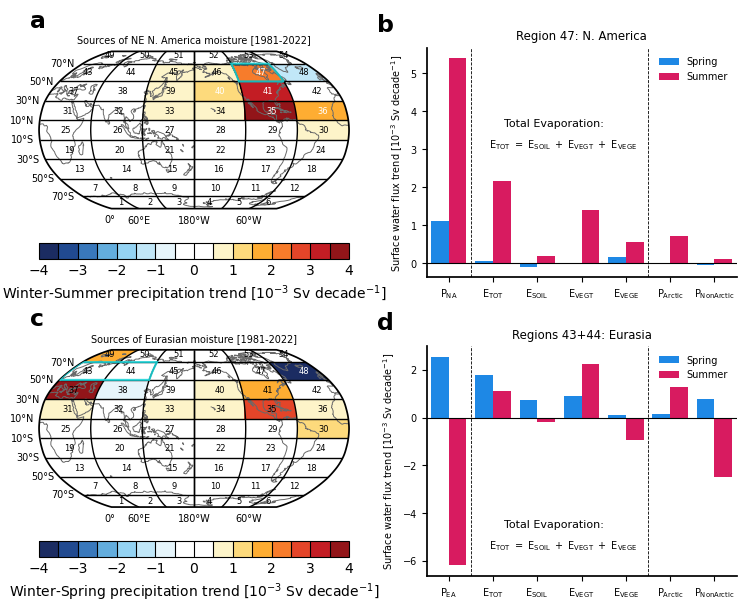

In [34]:
fig = plt.figure(figsize=(7.5,6))

# Panel 1--------------------------------------------------
ax = fig.add_subplot(221,projection=ccrs.Robinson(central_longitude=180))
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of NE N. America moisture [1981-2022]',fontsize=7)

ax.text(-0.03, 1.12, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)


num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(nr_diff_values[i,j]) >= 1:
            if cnt >= 49:
                ax.text(lon1+25, lat2-20, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols) 


cmap = colormaps.BlueWhiteOrangeRed
levels = np.arange(-0.004,0.0041,step=0.0005)
levels = np.arange(-4,4.1,step=0.5)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

p = ax.pcolormesh(X, Y, svnr_diff_values/1.0E06*10*1000, 
                        cmap=cmap,
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                 )

cb.set_label(r'Winter-Summer precipitation trend [$\mathrm{10^{-3}\ Sv\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

ax.spines['geo'].set_linewidth(1.25)

# Colorbar
colorbar_position = cb.ax.get_position()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False 
gl.left_labels = True  
gl.right_labels = False  
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[-120, 50], width=60, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    #linestyle='--',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 2--------------------------------------------------
ax = fig.add_subplot(223,projection=ccrs.Robinson(central_longitude=180))
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')
ax.set_title('Sources of Eurasian moisture [1981-2022]',fontsize=7)

ax.text(-0.03, 1.12, 'c', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

num_rows = 9
num_cols = 6

# Generate evenly spaced squares in a grid
cnt = 1
for i in range(num_rows):
    for j in range(num_cols):
        lon1 = 0 + j * (360 / num_cols)
        lat1 = -90 + i * (180 / num_rows)
        lon2 = lon1 + (360 / num_cols)
        lat2 = lat1 + (180 / num_rows)

        square = {'name': f'{cnt}', 'coords': (lon1, lat1, lon2, lat2)}

        # Plot the squares
        rectangle = Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, edgecolor='None', facecolor='none')
        ax.add_patch(rectangle)
        if abs(er_diff_values[i,j]) >= 1:
            if cnt >= 49:
                print(cnt)
                ax.text(lon1+25, lat2-30, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
            else:
                ax.text(lon1+25, lat2-15, square['name'], color='white', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        else:
            ax.text(lon1+25, lat2-15, square['name'], color='black', fontsize=6, va='bottom', ha='left', transform=ccrs.PlateCarree())
        cnt += 1

# Create a grid of values corresponding to the squares
x = np.linspace(0, 360, num_cols + 1)
y = np.linspace(-90, 90, num_rows + 1)
X, Y = np.meshgrid(x, y)
Z = np.random.rand(num_rows, num_cols)

cmap = colormaps.BlueWhiteOrangeRed

norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

p = ax.pcolormesh(X, Y, sver_diff_values*10/1.0E06*1000, 
                        cmap=cmap,
                        #shading='auto', 
                        alpha=1.0, 
                        norm=norm,
                        transform=ccrs.PlateCarree(),
                       )
# Colorbar

cb = plt.colorbar(p,orientation='horizontal', 
                  drawedges=True,
                  ticks=levels[::2]
                 )


cb.set_label(r'Winter-Spring precipitation trend [$\mathrm{10^{-3}\ Sv\ decade^{-1}}$]')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)
cb.ax.minorticks_off()

ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1.0,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='-', alpha=1.0)
gl.top_labels = False 
gl.left_labels = True  
gl.right_labels = False  
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -70, -50, -30, -10, 10, 30, 50, 70, 90])

ax.add_patch(mpatches.Rectangle(xy=[0, 50], width=120, height=20,
                                    facecolor='none',
                                    edgecolor='#1CDADE',
                                    linestyle='-',
                                    linewidth=1.5,
                                    zorder=103,
                                    alpha=0.85,
                                    transform=ccrs.PlateCarree())
                 )

# Panel 1--------------------------------------------------
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

bar_width=0.8

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(224)
ax.set_xlim([0,14])
ax.set_ylabel(r'Surface water flux trend [$\mathrm{10^{-3}\ Sv\ decade^{-1}}$]')
ax.set_title('Regions 43+44: Eurasia')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$P_{EA}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$P_{Arctic}$',
                    r'$P_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       [(winter_mean_trend(area_sum((qrain['RAIN']+qsnow['SNOW'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(area_sum((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(area_sum((qsoil['QSOIL'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(area_sum((qvegt['QVEGT'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(area_sum((qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(arctic_sum((prec43+prec44).sum('prec')*1000))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000))).values*10/1000/1.0E06*1000,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [(summer_mean_trend(area_sum((qrain['RAIN']+qsnow['SNOW'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(area_sum((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(area_sum((qsoil['QSOIL'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(area_sum((qvegt['QVEGT'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(area_sum((qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(arctic_sum((prec43+prec44).sum('prec')*1000))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(non_arctic_sum((prec43+prec44).sum('prec')*1000))).values*10/1000/1.0E06*1000,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )


ax.text(0.25, 0.2, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.2, 0.1, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='upper right',edgecolor='white',framealpha=1.0)

ax.axvline(2,linestyle='--',c='k',linewidth=0.6)
ax.axvline(10,linestyle='--',c='k',linewidth=0.6)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

#===========================================================
## North America
#===========================================================

## Panel 1 --------------------------------------------------
ax = fig.add_subplot(222)
ax.set_xlim([0,14])
#ax.set_ylim([-120,120])
#ax.set_ylabel('Summer')
ax.set_ylabel(r'Surface water flux trend [$\mathrm{10^{-3}\ Sv\ decade^{-1}}$]')
#ax.set_xlabel('year')
ax.set_title('Region 47: N. America')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xticks(np.arange(1,15,step=2))

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)

ax.set_xticklabels([r'$P_{NA}$',
                    r'$E_{TOT}$',
                    r'$E_{SOIL}$',
                    r'$E_{VEGT}$',
                    r'$E_{VEGE}$',
                    r'$P_{Arctic}$',
                    r'$P_{NonArctic}$',
                   ])
    
ax.text(-0.16, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.bar(np.arange(1,15,step=2)-0.4,
       #(winter_mean_trend(na_sum((qrain['RAIN']+qsnow['SNOW'])/1000))/1.0E06).values*10
       [(winter_mean_trend(na_sum((qrain['RAIN']+qsnow['SNOW'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(na_sum((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(na_sum((qsoil['QSOIL'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(na_sum((qvegt['QVEGT'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(na_sum((qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(arctic_sum(prec47.sum('prec')*1000))).values*10/1000/1.0E06*1000,
        (winter_mean_trend(non_arctic_sum(prec47.sum('prec')*1000))).values*10/1000/1.0E06*1000,
       ],
        color='#1E88E5', ##1E88E5,
        width=bar_width,
        label='Spring',
       
      )


ax.bar(np.arange(1,15,step=2)+0.4,
       [(summer_mean_trend(na_sum((qrain['RAIN']+qsnow['SNOW'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(na_sum((qsoil['QSOIL']+qvegt['QVEGT']+qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(na_sum((qsoil['QSOIL'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(na_sum((qvegt['QVEGT'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(na_sum((qvege['QVEGE'])))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(arctic_sum(prec47.sum('prec')*1000))).values*10/1000/1.0E06*1000,
        (summer_mean_trend(non_arctic_sum(prec47.sum('prec')*1000))).values*10/1000/1.0E06*1000,
       ],
        color='#D81B60', ##1E88E5
        width=bar_width,
       label='Summer'
       
      )


ax.text(0.25, 0.65, 'Total Evaporation:',
        fontsize=8,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(0.2, 0.55, r'$E_{TOT}\ =\ E_{SOIL}\ +\ E_{VEGT}\ +\ E_{VEGE}$',
        fontsize=7,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

plt.legend(frameon=True,loc='upper right',edgecolor='white',framealpha=1.0)

ax.axvline(2,linestyle='--',c='k',linewidth=0.6)
ax.axvline(10,linestyle='--',c='k',linewidth=0.6)
ax.axhline(0,linestyle='-',c='k',linewidth=0.8)

fig.subplots_adjust(top=0.92,bottom=0.04,left=0.05,right=0.98,hspace=0.3,wspace=0.25)
#fig.savefig('./plots/moisture_tagging-figure_5-supp-evap_fluxes-Sv.png',dpi=600)